In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# exploration questions:
# are there any months in the year that seem to be higher AQI? lower AQI?
# are there any gases that change in level frequently? are there any that seem to change in tandem with others?

## AQI Basics

    Daily AQI color     Level of concern           Value of index     Desc. of air quality

    Green               Good                       0 to 50            Air quality is satisfactory, and air pollution poses
                                                                      little or no risk.

    Yellow              Moderate                   51 to 100          Air quality is acceptable. However, there may be a
                                                                      risk for some people, particularly those who are
                                                                      unusually sensitive to air pollution.

    Orange              Unhealthy for sensitive    101 to 150         Members of sensitive groups may experience health
                                                                      effects. The general public is less likely to be
                                                                      affected.

    Red                 Unhealthy                  151 to 200         Some members of the general public may experience
                                                                      health effects; members of sensitive groups may
                                                                      experience more serious health effects.

    Purple              Very unhealthy             201 to 300         Health alert: The risk of health effects is increased
                                                                      for everyone.

    Maroon              Hazardous                  301+               Health warning of emergency conditions: everyone
                                                                      is more likely to be affected.
        

In [3]:
air_quality = pd.read_csv('data/aqi_data.csv')
air_quality.columns

Index(['Id', 'Mounths', 'PM10 in æg/m3', 'SO2 in æg/m3', 'NOx  in æg/m3',
       ' PM2.5  in æg/m3', 'Ammonia - NH3  in æg/m3', 'O3   in æg/m3',
       'CO  in mg/m3', ' Benzene  in æg/m3', 'AQI'],
      dtype='object')

In [4]:
# renaming columns
air_quality.columns = ['id', 'month', 'PM10', 'SO2', 'NOx', 'PM25', 'NH3', 'O3', 'CO', 'benzene', 'AQI']
air_quality

,id,month,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.50,0.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...
67,68,Aug-22,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0
68,69,Sep-22,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0
69,70,Oct-22,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0
70,71,Nov-22,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0


In [5]:
# checking data types
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       72 non-null     int64  
 1   month    72 non-null     object 
 2   PM10     66 non-null     float64
 3   SO2      71 non-null     float64
 4   NOx      70 non-null     float64
 5   PM25     72 non-null     int64  
 6   NH3      72 non-null     float64
 7   O3       72 non-null     float64
 8   CO       72 non-null     float64
 9   benzene  72 non-null     float64
 10  AQI      67 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 6.3+ KB


In [6]:
air_quality.head()

,id,month,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI
0,1,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.9,0.7,149.0
1,2,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.9,0.9,129.0
2,3,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.8,0.5,128.0
3,4,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.9,0.7,111.0
4,5,May-17,NaN,41.6,25.2,53,28.0,70.0,0.5,0.5,NaN


In [7]:
# selecting only non-null aqi values
aqi = air_quality.loc[air_quality.AQI.notnull()]

In [8]:
#dropping id column
aqi = aqi.drop(columns='id')

In [9]:
# creating new column with quality classification
# with for loop

for index, row in aqi.iterrows():
    if row.AQI <50:
        aqi.loc[index, 'level_of_concern'] = 'good'
    elif row.AQI <100:
        aqi.loc[index, 'level_of_concern'] = 'moderate'
    elif row.AQI <150:
        aqi.loc[index, 'level_of_concern'] = 'unhealthy for sensitive'
    elif row.AQI <200:
        aqi.loc[index, 'level_of_concern'] = 'unhealthy'
    elif row.AQI <300:
        aqi.loc[index, 'level_of_concern'] = 'very unhealthy'
    elif row.AQI >301:
        aqi.loc[index, 'level_of_concern'] = 'hazardous'
    else: # for any null values / mistakes
        aqi.loc[index, 'level_of_concern'] = '-1'

In [10]:
# value counts for level of concern by number of months

months_count = aqi.level_of_concern.value_counts().reset_index().rename(columns = {'index':'level_of_concern', 'level_of_concern':'months_count'})
months_count

,level_of_concern,months_count
0,unhealthy for sensitive,37
1,moderate,27
2,unhealthy,3


In [11]:
# creating new year column
aqi["year"] = '20'
aqi.year = aqi.year+aqi.month.str.slice(-2) # this will still be an object dtype
aqi

,month,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern,year
0,Jan-17,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0,unhealthy for sensitive,2017
1,Feb-17,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0,unhealthy for sensitive,2017
2,Mar-17,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0,unhealthy for sensitive,2017
3,Apr-17,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0,unhealthy for sensitive,2017
6,Jul-17,111.0,38.9,21.5,29,30.0,24.4,0.30,0.70,106.7,unhealthy for sensitive,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Aug-22,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0,moderate,2022
68,Sep-22,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0,moderate,2022
69,Oct-22,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0,unhealthy for sensitive,2022
70,Nov-22,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0,unhealthy,2022


In [12]:
# simplifying month column
aqi.month = aqi.month.str[0:3]

In [13]:
# rearranging columns
aqi = aqi[['month', 'year', 'PM10', 'SO2', 'NOx', 'PM25', 'NH3', 'O3', 'CO', 'benzene', 'AQI', 'level_of_concern']]

In [14]:
# creating new df for high concern
unhealthy = aqi.loc[aqi.AQI > 100]

In [15]:
# any months that seem to be higher?
# grouping by month
unhealthy.month.value_counts()

Jan    6
Mar    6
Feb    5
Apr    4
May    4
Dec    4
Oct    3
Nov    3
Jul    2
Jun    2
Aug    1
Name: month, dtype: int64

In [16]:
# grouping by months in a year
unhealthy.year.value_counts()

2020    9
2018    8
2022    8
2017    6
2019    6
2021    3
Name: year, dtype: int64

Interesting that 2020 claims the highest amount of months that were considered an unhealthy level of concern... I would have estiamated it to be less with travel ceasing for many people. Perhaps COVID-19 affected a packed city like Hyderabad differently than many other cities in the world. Or, perhaps there are other greater contributing factors to decreased air quality than travel - factories? weather? fires?

In [17]:
aqi

,month,year,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern
0,Jan,2017,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0,unhealthy for sensitive
1,Feb,2017,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0,unhealthy for sensitive
2,Mar,2017,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0,unhealthy for sensitive
3,Apr,2017,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0,unhealthy for sensitive
6,Jul,2017,111.0,38.9,21.5,29,30.0,24.4,0.30,0.70,106.7,unhealthy for sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...
67,Aug,2022,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0,moderate
68,Sep,2022,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0,moderate
69,Oct,2022,93.0,12.0,30.7,46,28.0,9.7,0.67,0.07,101.0,unhealthy for sensitive
70,Nov,2022,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0,unhealthy


Are there any particular pollutants that seem to influence overall AQI more than others?

In [18]:
aqi.PM10.max()

178.0

In [19]:
aqi.PM10.min()

76.0

In [20]:
aqi.AQI.max()

166.0

In [21]:
aqi.AQI.min()

58.0

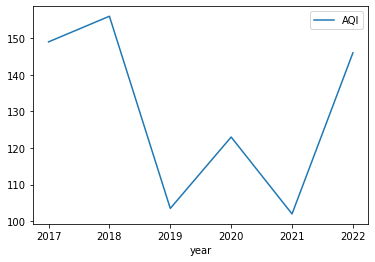

In [22]:
# zoom in on single month through years (Jan)
aqi.loc[aqi.month == 'Jan'].plot(x='year', y='AQI');

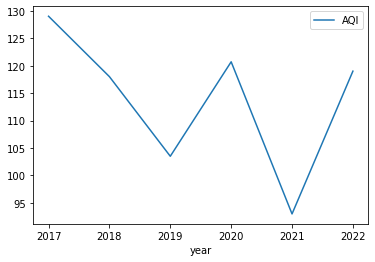

In [23]:
# zoom in on Feb
aqi.loc[aqi.month == 'Feb'].plot(x='year', y='AQI');

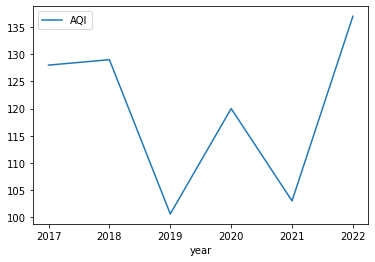

In [24]:
# zoom in on Mar
aqi.loc[aqi.month == 'Mar'].plot(x='year', y='AQI');

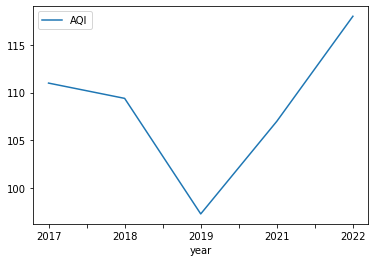

In [25]:
# zoom in on Apr
aqi.loc[aqi.month == 'Apr'].plot(x='year', y='AQI');

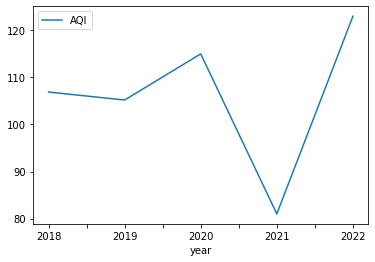

In [26]:
# zoom in on May
aqi.loc[aqi.month == 'May'].plot(x='year', y='AQI');

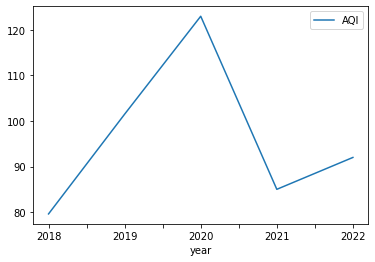

In [27]:
# zoom in on Jun
aqi.loc[aqi.month == 'Jun'].plot(x='year', y='AQI');

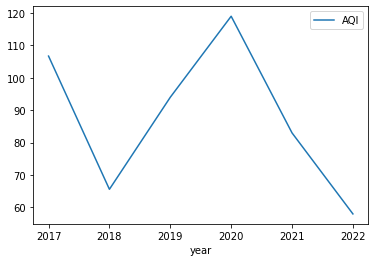

In [28]:
# zoom in on Jul
aqi.loc[aqi.month == 'Jul'].plot(x='year', y='AQI');

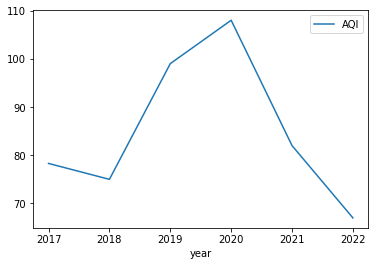

In [29]:
# zoom in on Aug
aqi.loc[aqi.month == 'Aug'].plot(x='year', y='AQI');

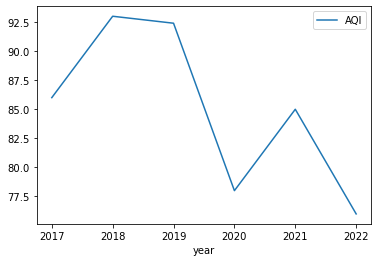

In [30]:
# zoom in on Sep
aqi.loc[aqi.month == 'Sep'].plot(x='year', y='AQI');

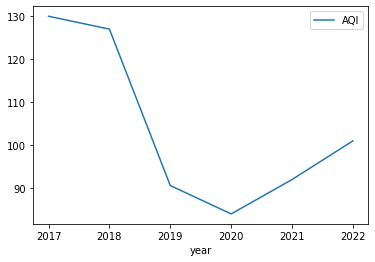

In [31]:
# zoom in on Oct
aqi.loc[aqi.month == 'Oct'].plot(x='year', y='AQI');

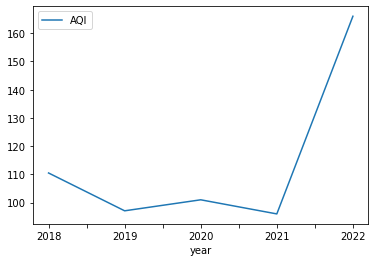

In [32]:
# zoom in on Nov
aqi.loc[aqi.month == 'Nov'].plot(x='year', y='AQI');

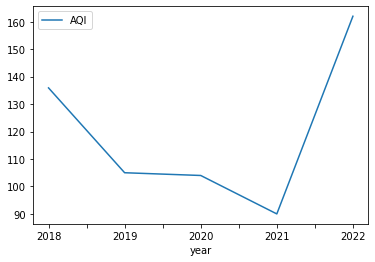

In [33]:
# zoom in on Dec
aqi.loc[aqi.month == 'Dec'].plot(x='year', y='AQI');

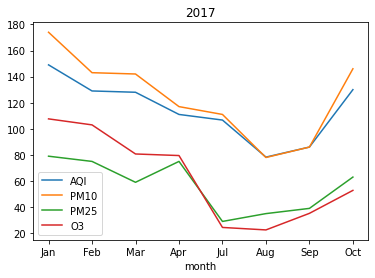

In [34]:
# creating dfs for each year
aqi_2017 = aqi.loc[aqi.year == '2017']
graph_2017_top = aqi_2017.plot(x='month', y=['AQI', 'PM10', 'PM25', 'O3'], title='2017')
graph_2017_top;

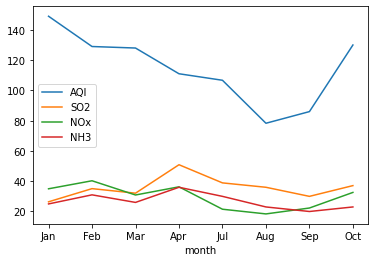

In [35]:
# splitting into two different charts for more detailed comparison
graph_2017_bottom = aqi_2017.plot(x='month', y=['AQI', 'SO2', 'NOx', 'NH3'])
graph_2017_bottom;

In [36]:
# the rest of the years

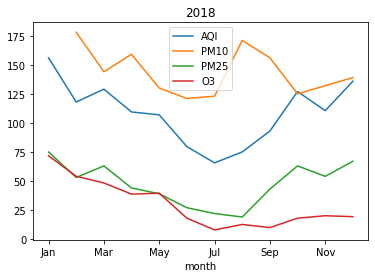

In [37]:
aqi_2018 = aqi.loc[aqi.year == '2018']
graph_2018_top = aqi_2018.plot(x='month', y=['AQI', 'PM10', 'PM25', 'O3'], title='2018')
graph_2018_top;

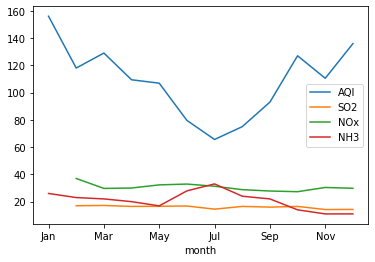

In [38]:
graph_2018_bottom = aqi_2018.plot(x='month', y=['AQI', 'SO2', 'NOx', 'NH3'])
graph_2018_bottom;

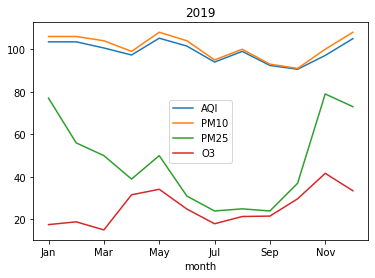

In [39]:
aqi_2019 = aqi.loc[aqi.year == '2019']
graph_2019_top = aqi_2019.plot(x='month', y=['AQI', 'PM10', 'PM25', 'O3'], title='2019')
graph_2019_top;

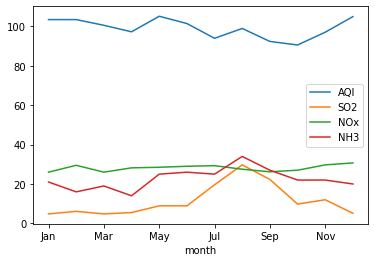

In [40]:
graph_2019_bottom = aqi_2019.plot(x='month', y=['AQI', 'SO2', 'NOx', 'NH3'])
graph_2019_bottom;

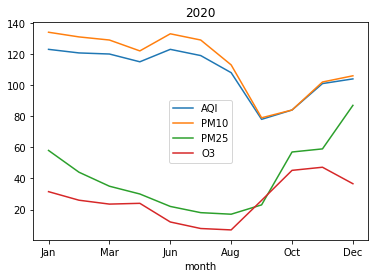

In [41]:
aqi_2020 = aqi.loc[aqi.year == '2020']
graph_2020_top = aqi_2020.plot(x='month', y=['AQI', 'PM10', 'PM25', 'O3'], title='2020')
graph_2020_top;

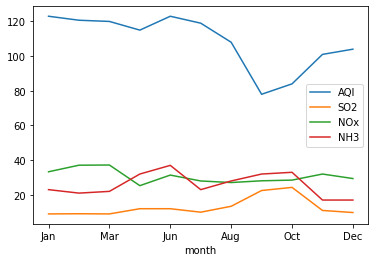

In [42]:
graph_2020_bottom = aqi_2020.plot(x='month', y=['AQI', 'SO2', 'NOx', 'NH3'])
graph_2020_bottom;

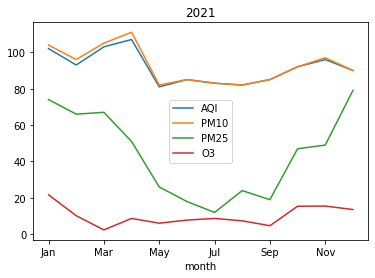

In [43]:
aqi_2021 = aqi.loc[aqi.year == '2021']
graph_2021_top = aqi_2021.plot(x='month', y=['AQI', 'PM10', 'PM25', 'O3'], title='2021')
graph_2021_top;

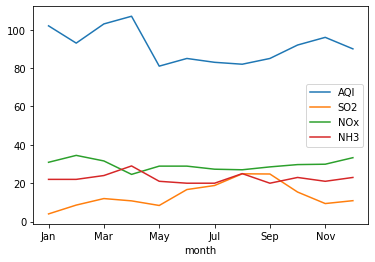

In [44]:
graph_2021_bottom = aqi_2021.plot(x='month', y=['AQI', 'SO2', 'NOx', 'NH3'])
graph_2021_bottom;

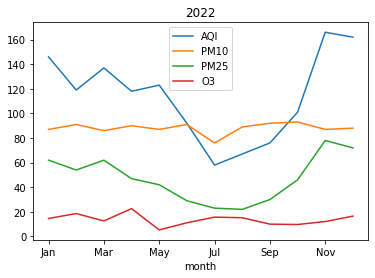

In [45]:
aqi_2022 = aqi.loc[aqi.year == '2022']
graph_2022_top = aqi_2022.plot(x='month', y=['AQI', 'PM10', 'PM25', 'O3'], title='2022')
graph_2022_top;

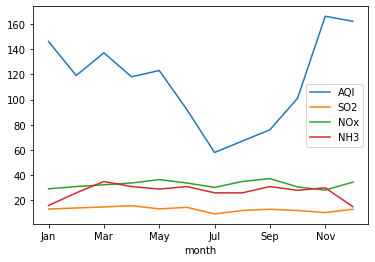

In [46]:
graph_2022_bottom = aqi_2022.plot(x='month', y=['AQI', 'SO2', 'NOx', 'NH3'])
graph_2022_bottom;

Are there any gases that change in level frequently? are there any that seem to change in tandem with others?

PM25 appears to change frequently, O3 as well. It is difficult to zoom in on the smaller numbers in these current graphs, since the graph is larger scale. Let's zoom in.

In [47]:
#smaller scale numbers only:

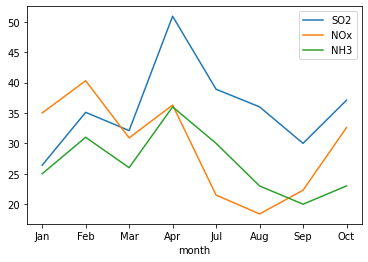

In [48]:
# 2017
aqi_2017.plot(x='month', y=['SO2', 'NOx', 'NH3']);

All three types of pollutants appear to track together.

Let's look at the next few years.

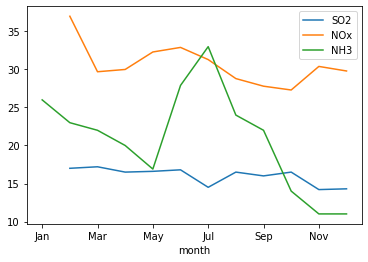

In [49]:
# 2018
aqi_2018.plot(x='month', y=['SO2', 'NOx', 'NH3']);

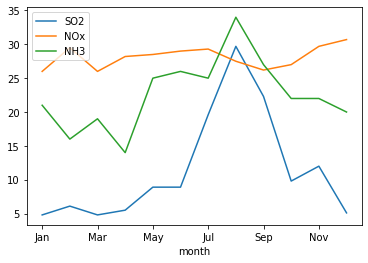

In [50]:
# 2019
aqi_2019.plot(x='month', y=['SO2', 'NOx', 'NH3']);

Are there any months that raise serious concerns or questions?

In [51]:
# average of all AQI readings (base AQI)
aqi.AQI.mean()

105.57164179104477

In [52]:
# AQI average grouped by month
aqi.groupby('month').mean().AQI

month
Apr    108.540000
Aug     84.883333
Dec    119.380000
Feb    113.866667
Jan    129.916667
Jul     87.716667
Jun     96.220000
Mar    119.600000
May    106.220000
Nov    114.120000
Oct    104.100000
Sep     85.066667
Name: AQI, dtype: float64

January is a particularly high month, with December, February, and November being slightly higher than average AQI.

Which months are lowest?

If average is 105 AQI, August, July, and September are averaging lower, and June is slightly lower.

In [53]:
aqi.sort_values(by='AQI', ascending=False)

,month,year,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern
70,Nov,2022,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0,unhealthy
71,Dec,2022,88.0,13.0,34.5,72,15.0,16.5,1.39,0.04,162.0,unhealthy
12,Jan,2018,NaN,NaN,NaN,75,26.0,71.7,0.80,0.40,156.0,unhealthy
0,Jan,2017,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0,unhealthy for sensitive
60,Jan,2022,87.0,13.2,29.2,62,16.0,14.6,0.54,0.05,146.0,unhealthy for sensitive
...,...,...,...,...,...,...,...,...,...,...,...,...
68,Sep,2022,92.0,13.0,37.3,30,31.0,10.0,0.70,0.06,76.0,moderate
19,Aug,2018,171.0,16.5,28.8,19,24.0,12.6,0.30,0.20,75.0,moderate
67,Aug,2022,89.0,12.0,35.0,22,26.0,15.2,0.64,0.09,67.0,moderate
18,Jul,2018,123.0,14.5,31.3,22,33.0,7.9,0.20,0.40,65.6,moderate


In [54]:
unhealthy = aqi.loc[aqi.level_of_concern == 'unhealthy']
unhealthy

,month,year,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern
12,Jan,2018,NaN,NaN,NaN,75,26.0,71.7,0.80,0.40,156.0,unhealthy
70,Nov,2022,87.0,10.4,28.2,78,30.0,12.1,1.52,0.03,166.0,unhealthy
71,Dec,2022,88.0,13.0,34.5,72,15.0,16.5,1.39,0.04,162.0,unhealthy


In [55]:
unhealthy_sensitive = aqi.loc[aqi.level_of_concern == 'unhealthy for sensitive']
unhealthy_sensitive

,month,year,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern
0,Jan,2017,174.0,26.4,35.0,79,25.0,107.6,0.90,0.70,149.0,unhealthy for sensitive
1,Feb,2017,143.0,35.1,40.3,75,31.0,103.0,0.90,0.90,129.0,unhealthy for sensitive
2,Mar,2017,142.0,32.1,30.9,59,26.0,80.7,0.80,0.50,128.0,unhealthy for sensitive
3,Apr,2017,117.0,50.9,36.3,75,36.0,79.5,0.90,0.70,111.0,unhealthy for sensitive
6,Jul,2017,111.0,38.9,21.5,29,30.0,24.4,0.30,0.70,106.7,unhealthy for sensitive
9,Oct,2017,146.0,37.1,32.6,63,23.0,52.8,0.60,0.50,130.0,unhealthy for sensitive
13,Feb,2018,178.0,17.0,37.0,53,23.0,54.1,0.70,0.30,118.0,unhealthy for sensitive
14,Mar,2018,144.0,17.2,29.7,63,22.0,48.3,0.70,0.30,129.0,unhealthy for sensitive
15,Apr,2018,159.0,16.5,30.0,44,20.0,38.7,0.50,0.20,109.4,unhealthy for sensitive
16,May,2018,130.0,16.6,32.3,39,16.9,39.5,0.50,0.20,106.9,unhealthy for sensitive


In [56]:
aqi.level_of_concern.unique()

array(['unhealthy for sensitive', 'moderate', 'unhealthy'], dtype=object)

In [57]:
moderate = aqi.loc[aqi.level_of_concern == 'moderate']
moderate

,month,year,PM10,SO2,NOx,PM25,NH3,O3,CO,benzene,AQI,level_of_concern
7,Aug,2017,78.0,36.0,18.4,35,23.0,22.5,0.40,0.50,78.3,moderate
8,Sep,2017,86.0,30.0,22.3,39,20.0,35.2,0.40,0.40,86.0,moderate
17,Jun,2018,121.0,16.8,32.9,27,27.9,18.0,0.70,0.30,79.6,moderate
18,Jul,2018,123.0,14.5,31.3,22,33.0,7.9,0.20,0.40,65.6,moderate
19,Aug,2018,171.0,16.5,28.8,19,24.0,12.6,0.30,0.20,75.0,moderate
20,Sep,2018,156.0,16.0,27.8,43,22.0,9.9,0.40,0.20,93.0,moderate
27,Apr,2019,99.0,5.5,28.2,39,14.0,31.6,0.50,0.10,97.3,moderate
30,Jul,2019,95.0,19.6,29.3,24,25.0,18.0,0.30,0.10,94.0,moderate
31,Aug,2019,100.0,29.7,27.5,25,34.0,21.4,0.40,0.10,99.0,moderate
32,Sep,2019,93.0,22.3,26.2,24,27.0,21.6,0.50,0.10,92.4,moderate


How many months fall into each category?

In [58]:
# moderate:
moderate.month.count()

27

In [59]:
# unhealthy for sensitive
unhealthy_sensitive.month.count()

37

In [60]:
# unhealthy
unhealthy.month.count()

3

Looking into each table: how many months of each year?